<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793918_HelmyMoreno/blob/main/Actividad_5_Reduccion_dimensiones_v01793918.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Elaborado por** Helmy Andrea Moreno Navarro | 01793918

**Presentado a** María de la Paz Rico

# Bienvenido al notebook
#Repaso de Reduccion de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [1]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig

# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")

# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción

values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz
 
print("-------Matriz reconstruida-------")

# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------

B = np.dot(W,D)
B = np.dot(B,Winv)

print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


Para el presente ejercicio podemos concluir que su mayor variabilidad fue:

    0.61232756  0.40824829

In [2]:
#Matriz A1

# define la matriz
A1 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original-------")
print(A1)
print("-----------------------------")

# calcula la eigendescomposición
values, vectors = eig(A1)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción

values, vectors = np.linalg.eig(A1)

W1 = vectors
W1inv = np.linalg.inv(W1)
D1 = np.diag(values)
#la matriz B tiene que dar igual a A1
#reconstruye la matriz
 
print("-------Matriz reconstruida-------")

# Realiza la reconstruccion de B1=W1*D1*W1inv, te da lo mismo de A1?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------

B1 = np.dot(W1,D1)
B1 = np.dot(B1, W1inv)

print(B1)
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[ 3.00000000e+00+1.12272023e-16j  3.36536354e-16-9.67833078e-17j
   2.00000000e+00-3.95053829e-17j]
 [ 3.00000000e+00-1.66253281e-16j  9.99200722e-16+1.12958209e-16j
  -2.00000000e+00+2.77350775e-17j]
 [ 1.11022302e-16+1.03283117e-18j  1.00000000e+00-7.61630485e-17j
   1.00000000e+00+1.02438275e-16j]]
-----------------------------



Para el presente ejercicio podemos concluir que su mayor variabilidad fue:
    
    0.86167879+0.j y 0.86167879-0.j 

In [3]:
#Matriz A2

# define la matriz
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original-------")
print(A2)
print("-----------------------------")

# calcula la eigendescomposición
values, vectors = eig(A2)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción

values, vectors = np.linalg.eig(A2)

W2 = vectors
W2inv = np.linalg.inv(W2)
D2 = np.diag(values)
#la matriz B tiene que dar igual a A2
#reconstruye la matriz
 
print("-------Matriz reconstruida-------")

# Realiza la reconstruccion de B2=W2*D2*W2inv, te da lo mismo de A2?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------

B2 = np.dot(W2,D2)
B2 = np.dot(B2, W2inv)

print(B2)
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
[[1.00000000e+00 3.00000000e+00 8.00000000e+00]
 [2.00000000e+00 7.41483138e-17 7.08397389e-16]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
-----------------------------


Para el presente ejercicio podemos concluir que su mayor variabilidad fue:

    0.83205029 y 0.70710678.

In [4]:
#Matriz A3

# define la matriz
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original-------")
print(A3)
print("-----------------------------")

# calcula la eigendescomposición
values, vectors = eig(A3)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción

values, vectors = np.linalg.eig(A3)

W3 = vectors
W3inv = np.linalg.inv(W3)
D3 = np.diag(values)
#la matriz B tiene que dar igual a A3
#reconstruye la matriz
 
print("-------Matriz reconstruida-------")

# Realiza la reconstruccion de B3=W3*D3*W3inv, te da lo mismo de A3?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------

B3 = np.dot(W3,D3)
B3 = np.dot(B3, W3inv)

print(B3)
print("-----------------------------")

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------
[[ 5.00000000e+00  4.00000000e+00 -1.53912019e-15]
 [ 1.00000000e+00 -1.30389602e-15  1.00000000e+00]
 [ 1.00000000e+01  7.00000000e+00  1.00000000e+00]]
-----------------------------


Para el presente ejercicio podemos concluir que su mayor variabilidad fue:

    0.89811861 y 0.57580768.

**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


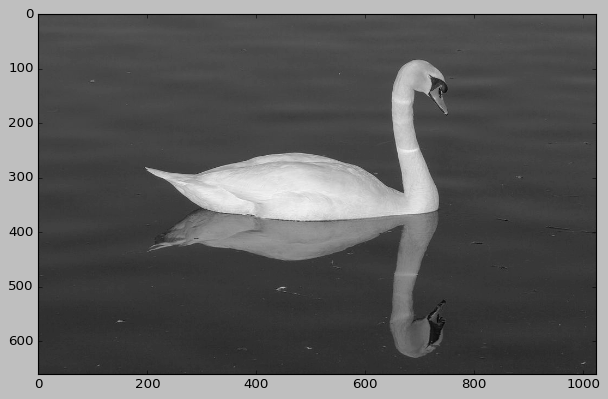

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F2C2295F090>


In [5]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [6]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [7]:
U.shape

(660, 660)

In [8]:
V.shape

(1024, 1024)

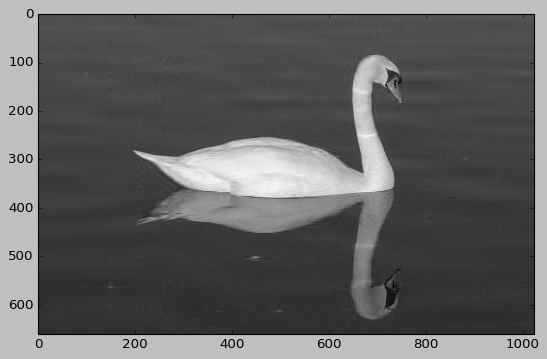

Felicidades la imagen está comprimida


In [9]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50

#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[120. 120. 121. ... 187. 185. 182.]


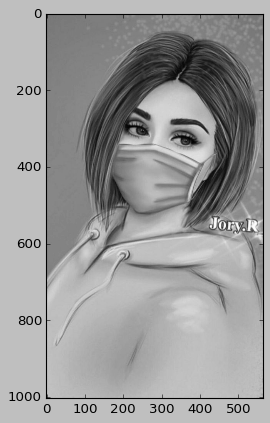

<PIL.Image.Image image mode=LA size=564x1002 at 0x7F2C2295FB50>


In [10]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img2 = Image.open(urllib.request.urlopen('https://i.pinimg.com/564x/cf/2c/53/cf2c5316d54b61ebdd95ce4352449f82.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img2.convert('LA')
img1 = np.array(list(imggray.getdata(band=0)),float)

print(img1)

img1.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(img1, cmap="gray")
plt.show()
print(img)

In [11]:
U,D,V = np.linalg.svd(img1)
img1.shape

(1002, 564)

In [12]:
U.shape

(1002, 1002)

In [13]:
V.shape

(564, 564)

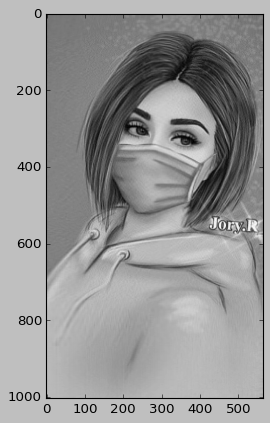

Felicidades la imagen está comprimida


In [14]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 100
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[220. 220. 220. ... 134. 144. 154.]


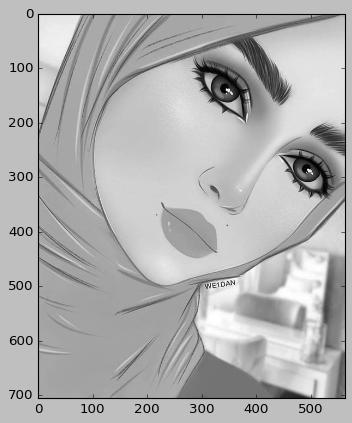

[[220. 220. 220. ... 203. 202. 201.]
 [227. 228. 228. ... 158. 158. 157.]
 [228. 228. 228. ... 179. 178. 178.]
 ...
 [168. 168. 168. ... 126. 137. 146.]
 [168. 168. 168. ... 128. 139. 149.]
 [167. 167. 167. ... 134. 144. 154.]]


In [15]:
img = Image.open(urllib.request.urlopen('https://i.pinimg.com/564x/72/7f/fb/727ffb1b3ade4e57272afb876a6c33dc.jpg')).convert('LA')
imggray = img.convert('LA')
img2 = np.array(list(imggray.getdata(band=0)),float)

print(img2)

img2.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(img2, cmap="gray")
plt.show()
print(img2)

In [16]:
U,D,V = np.linalg.svd(img2)
img2.shape

(705, 563)

In [17]:
U.shape

(705, 705)

In [18]:
V.shape

(563, 563)

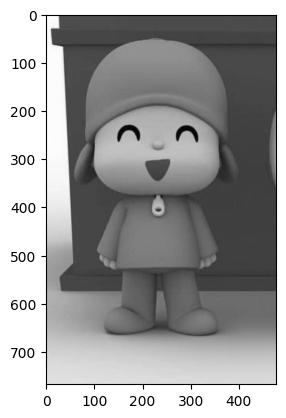

Felicidades la imagen está comprimida


In [35]:
nvalue = 100

reconstimg2 = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg2,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[255. 255. 255. ... 222. 222. 222.]


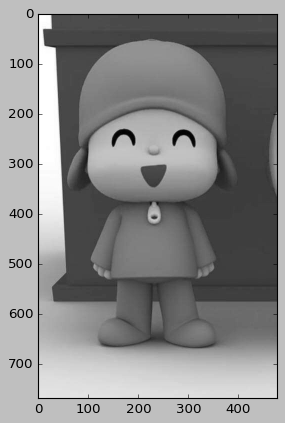

[[255. 255. 255. ...  74.  74.  74.]
 [255. 255. 255. ...  74.  74.  74.]
 [255. 255. 255. ...  74.  74.  74.]
 ...
 [229. 229. 229. ... 221. 221. 221.]
 [230. 230. 230. ... 222. 222. 222.]
 [230. 230. 230. ... 222. 222. 222.]]


In [20]:
img = Image.open(urllib.request.urlopen('https://i.pinimg.com/564x/40/5b/b7/405bb7ee2e3a7d19f48a8b6fcb25ad40.jpg')).convert('LA')
imggray = img.convert('LA')
img3 = np.array(list(imggray.getdata(band=0)),float)

print(img3)

img3.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(img3, cmap="gray")
plt.show()
print(img3)

In [21]:
U,D,V = np.linalg.svd(img3)
img3.shape

(768, 478)

In [22]:
U.shape

(768, 768)

In [23]:
V.shape

(478, 478)

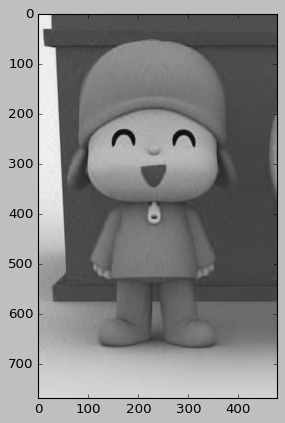

Felicidades la imagen está comprimida


In [24]:
nvalue = 40


reconstimg3 = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
plt.imshow(reconstimg3,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




##4. El número máximo de componentes significativos

5. Ejemplo de Python usando scikit-learn y el conjunto de datos de Iris

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')

# Cargar los datos 
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

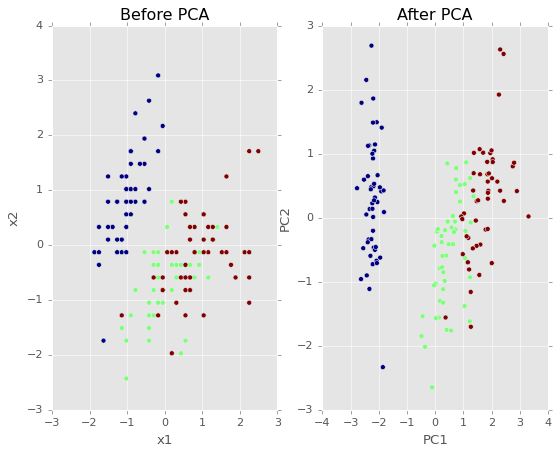

In [26]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

In [27]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


##6. Prueba de que los valores propios de la matriz de covarianza original son iguales a las varianzas del espacio reducido

**Verificar usando Python**

In [28]:
np.cov(X_new.T)

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [29]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

## 7. Importancia de la característica

In [30]:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


##8. The biplot

In [31]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

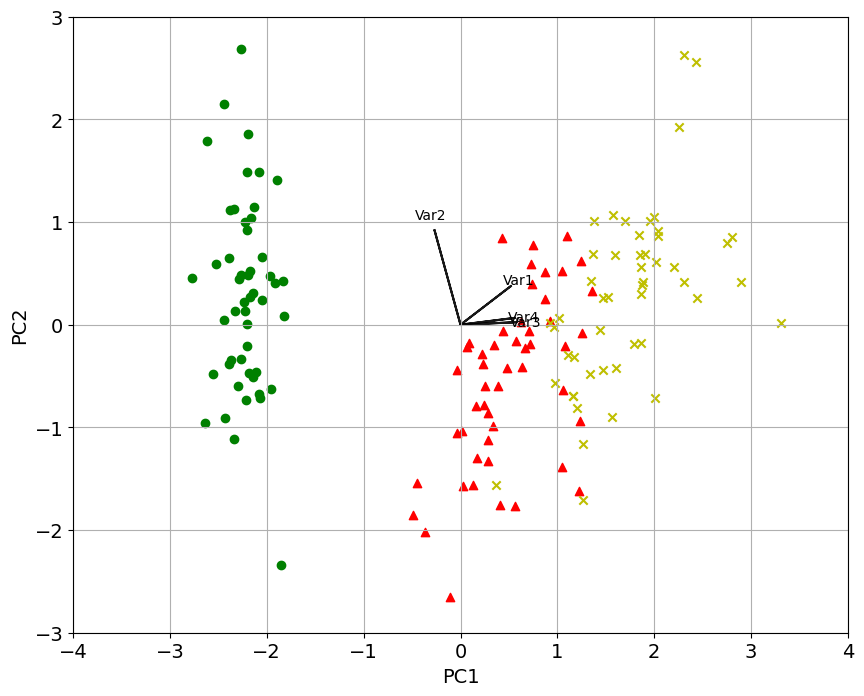

In [32]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style

biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [33]:
np.corrcoef(X[:,2], X[:,3])[1,0]



0.9628654314027957

In [34]:
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014

##Realiza un comentario relacionado a los pasos que se llevaron a cabo en este proceso de features importances.

**¿Qué es feature importance y para que nos sirve?**

Es la puntuación más alta que se le da a la variabilidad. Se representa a través de su magnitud. Nos ayuda a crear nuevas variables con características

su técnica más importante es:  la correlación estadística, calculados los modelos lineales, árboles de decisión y puntajes de importancia de permutación.

El feature importance ayuda a los modelados de predicción, lo que nos ayuda a proporcionar información sobre los datos, información sobre el modelo y la base para la reducción de dimensionalidad, estos valores seleccionados mejorarías la eficiencia y eficacia del modelo.

**¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**

Podría decirse que las variables mejora aplicadas y con mayor comprensión fueron las usadas a través del SVD, ya que me permitió ver de cerca su utilidad en la plicación con las imágenes. Se denota que los nvalues, en esta ocasión como propiedad me permiten ver la comprensión de una imagen, esto quiere decir hasta donde tengo alcance con la variabiliad ya sea a traves de sus columnas y/o filas donde me brindaría la mayor información y donde me la quitaría.

**¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**

En campos de  diseño, para entrenar modelos que necesiten conocer las características más importantes. ]También donde necesite reconocer la mayor importancia de los datos dentro de una matriz de datos.

También se aplica a los campos de medicina, estadística. Exámentes médicos, para tomar mejores decisiones frente a los resultados.

